# Create Time Series of Population-Weighted Temperature for a Given NERC Region


In [45]:
# Start by importing the packages we need:
import os
import datetime

import pandas as pd
import matplotlib.pyplot as plt


## Set the Directory Structure

In [2]:
# Identify the top-level directory and the subdirectory where the data will be stored:
hw_cs_data_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/data/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/plots/'


## Process the Time Series Data


In [25]:
# Define a function to process the time series of temperature for a given NERC region:
def process_temperature_time_series(hw_cs_data_dir: str, region: int):
    
    # Read in the raw time series data for all NERC regions:
    df = pd.read_csv((hw_cs_data_dir + 'nerc_temperature_time_series.csv'))
    
    # Subset to just the data for NERC region you want to use:
    subset_df = df[(df['NERC'] == region)].copy()

    # Set 'date' to a datetime variable and sort by date:
    subset_df['Date'] = pd.to_datetime(subset_df['date'])
    subset_df = subset_df.sort_values(['Date'])

    # Convert from Kelvin to Fahrenheit and round off the values:
    subset_df['T_min'] = (((subset_df['T_min'] - 273.15)*1.8)+32).round(2)
    subset_df['T_mean'] = (((subset_df['T_mean'] - 273.15)*1.8)+32).round(2)
    subset_df['T_max'] = (((subset_df['T_max'] - 273.15)*1.8)+32).round(2)

    # Rename the columns because I'm OCD:
    subset_df.rename(columns={'T_min': 'T_Min','T_mean': 'T_Mean','T_max': 'T_Max'}, inplace=True)

    # Only keep the columns we need:
    output_df = subset_df[['Date','T_Min','T_Mean','T_Max']].copy()
    
    return output_df


In [56]:
# Test the function:
output_df = process_temperature_time_series(hw_cs_data_dir = hw_cs_data_dir, 
                                            region = 6)

output_df


,Date,T_Min,T_Mean,T_Max
1,1980-01-01,33.88,36.45,39.52
17,1980-01-02,30.12,33.80,37.78
33,1980-01-03,27.33,31.14,36.70
49,1980-01-04,26.13,29.59,35.56
65,1980-01-05,27.67,31.46,35.77
...,...,...,...,...
262913,2024-12-27,33.24,36.05,39.78
262929,2024-12-28,35.41,38.33,41.78
262945,2024-12-29,35.16,37.88,41.91
262961,2024-12-30,29.77,33.64,38.59


## Process the Heat Wave and Cold Snap Library


In [83]:
# Define a function to extract the heat wave or cold snap data for a given NERC region and definition:
def process_hw_cs_dates(hw_cs_data_dir: str, region: int, definition: int):

    # Read in the heat wave library:
    hw_df = pd.read_csv((hw_cs_data_dir + 'hw_library.csv'))
    
    # Subset to just the data for NERC region and definition you want to use:
    hw_subset_df = hw_df[(hw_df['NERC_ID'] == ('NERC' + str(region))) & (hw_df['definition'] == ('def' + str(definition)))].copy()

    # Set date parameters as datetime variables:
    hw_subset_df['start_date'] = pd.to_datetime(hw_subset_df['start_date'])
    hw_subset_df['end_date'] = pd.to_datetime(hw_subset_df['end_date'])
        
    # Only keep the columns we need:
    hw_output_df = hw_subset_df[['start_date', 'end_date']].copy()

    # Read in the cold snap library:
    cs_df = pd.read_csv((hw_cs_data_dir + 'cs_library.csv'))
    
    # Subset to just the data for NERC region and definition you want to use:
    cs_subset_df = cs_df[(cs_df['NERC_ID'] == ('NERC' + str(region))) & (cs_df['definition'] == ('def' + str(definition)))].copy()

    # Set date parameters as datetime variables:
    cs_subset_df['start_date'] = pd.to_datetime(cs_subset_df['start_date'])
    cs_subset_df['end_date'] = pd.to_datetime(cs_subset_df['end_date'])
        
    # Only keep the columns we need:
    cs_output_df = cs_subset_df[['start_date', 'end_date']].copy()
    
    return hw_output_df, cs_output_df


In [105]:
# Test the function:
hw_df, cs_df = process_hw_cs_dates(hw_cs_data_dir = hw_cs_data_dir, 
                                   region = 6,
                                   definition = 6)

cs_df

for index, row in hw_df.iterrows():
    print(row['start_date'])
              

2021-06-26 00:00:00
2006-07-16 00:00:00
2021-08-08 00:00:00
2020-08-15 00:00:00
1992-08-09 00:00:00
2023-08-11 00:00:00
2017-08-21 00:00:00
2024-08-01 00:00:00
1988-08-30 00:00:00
2024-07-05 00:00:00
2017-07-30 00:00:00
2018-08-07 00:00:00
2015-06-24 00:00:00
1981-08-05 00:00:00
1994-07-19 00:00:00
2007-07-09 00:00:00
2022-08-17 00:00:00
2002-07-10 00:00:00
2021-07-23 00:00:00
2022-07-25 00:00:00
2003-07-27 00:00:00
2015-07-29 00:00:00
2022-08-29 00:00:00
2020-07-26 00:00:00
2009-07-25 00:00:00
1992-07-28 00:00:00
1996-08-23 00:00:00
1990-07-10 00:00:00
2004-07-22 00:00:00
1992-06-21 00:00:00
1987-08-29 00:00:00
2013-06-28 00:00:00
1998-07-26 00:00:00
1988-07-18 00:00:00
1990-08-03 00:00:00
2024-09-04 00:00:00
2018-07-22 00:00:00
2008-08-14 00:00:00
1996-07-11 00:00:00
2012-08-04 00:00:00
1985-07-07 00:00:00
2008-06-28 00:00:00
2003-07-17 00:00:00
1996-07-23 00:00:00
2002-07-21 00:00:00
1996-08-08 00:00:00
1992-07-17 00:00:00
1986-08-25 00:00:00
2018-07-13 00:00:00
2003-09-02 00:00:00


## Make the Plot


In [119]:
def plot_temperature_time_series(hw_cs_data_dir: str, region: int, definition: int, image_output_dir: str, image_resolution: int, save_images=False):

    # Read in NERC region name file and extract the name:
    nerc = pd.read_csv((hw_cs_data_dir + 'nerc_region_names.csv'))
    nerc_name = nerc.loc[nerc['number'] == region, 'short_name'].item()
    
    # Process the data using the function defined above:
    temp_df = process_temperature_time_series(hw_cs_data_dir = hw_cs_data_dir, 
                                              region = region)

    # Process the dates of heat waves and cold snaps:
    hw_df, cs_df = process_hw_cs_dates(hw_cs_data_dir = hw_cs_data_dir, 
                                       region = region,
                                       definition = definition)
    
    # Make the plot:
    plt.figure(figsize=(20, 10))
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.axisbelow'] = True
    plt.subplot(211)
    plt.plot(temp_df['Date'], temp_df['T_Max'], color='r', linestyle='-', linewidth=2)
    for index, row in hw_df.iterrows():
        plt.fill_between([pd.to_datetime(row['start_date']), pd.to_datetime(row['end_date'])], (temp_df['T_Max'].min() - 2), (temp_df['T_Max'].max() + 2), color='r', alpha=0.25)
    plt.xlim([datetime.date(1980, 1, 1), datetime.date(2025, 1, 1)])
    #plt.xlim([datetime.date(1990, 7, 1), datetime.date(1991, 6, 30)])
    #plt.xlim([datetime.date(2021, 1, 1), datetime.date(2022, 1, 1)])
    plt.ylim([(temp_df['T_Max'].min() - 2), (temp_df['T_Max'].max() + 2)])
    plt.ylabel('Max Temperature [$^\circ$F]', fontsize=18)
    plt.title(('Daily Maximum Temperature in ' + nerc_name))
    
    plt.subplot(212)
    plt.plot(temp_df['Date'], temp_df['T_Min'], color='b', linestyle='-', linewidth=2)
    for index, row in cs_df.iterrows():
        plt.fill_between([pd.to_datetime(row['start_date']), pd.to_datetime(row['end_date'])], (temp_df['T_Min'].min() - 2), (temp_df['T_Min'].max() + 2), color='b', alpha=0.25)
    plt.xlim([datetime.date(1980, 1, 1), datetime.date(2025, 1, 1)])
    #plt.xlim([datetime.date(1990, 7, 1), datetime.date(1991, 6, 30)])
    #plt.xlim([datetime.date(2021, 1, 1), datetime.date(2022, 1, 1)])
    plt.ylim([(temp_df['T_Min'].min() - 2), (temp_df['T_Min'].max() + 2)])
    plt.ylabel('Min Temperature [$^\circ$F]', fontsize=18)
    plt.title(('Daily Minimum Temperature in ' + nerc_name))
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir + 'NERC' + str(region) + '_Temperature_E.png'), dpi=image_resolution, bbox_inches='tight')
       # plt.close()


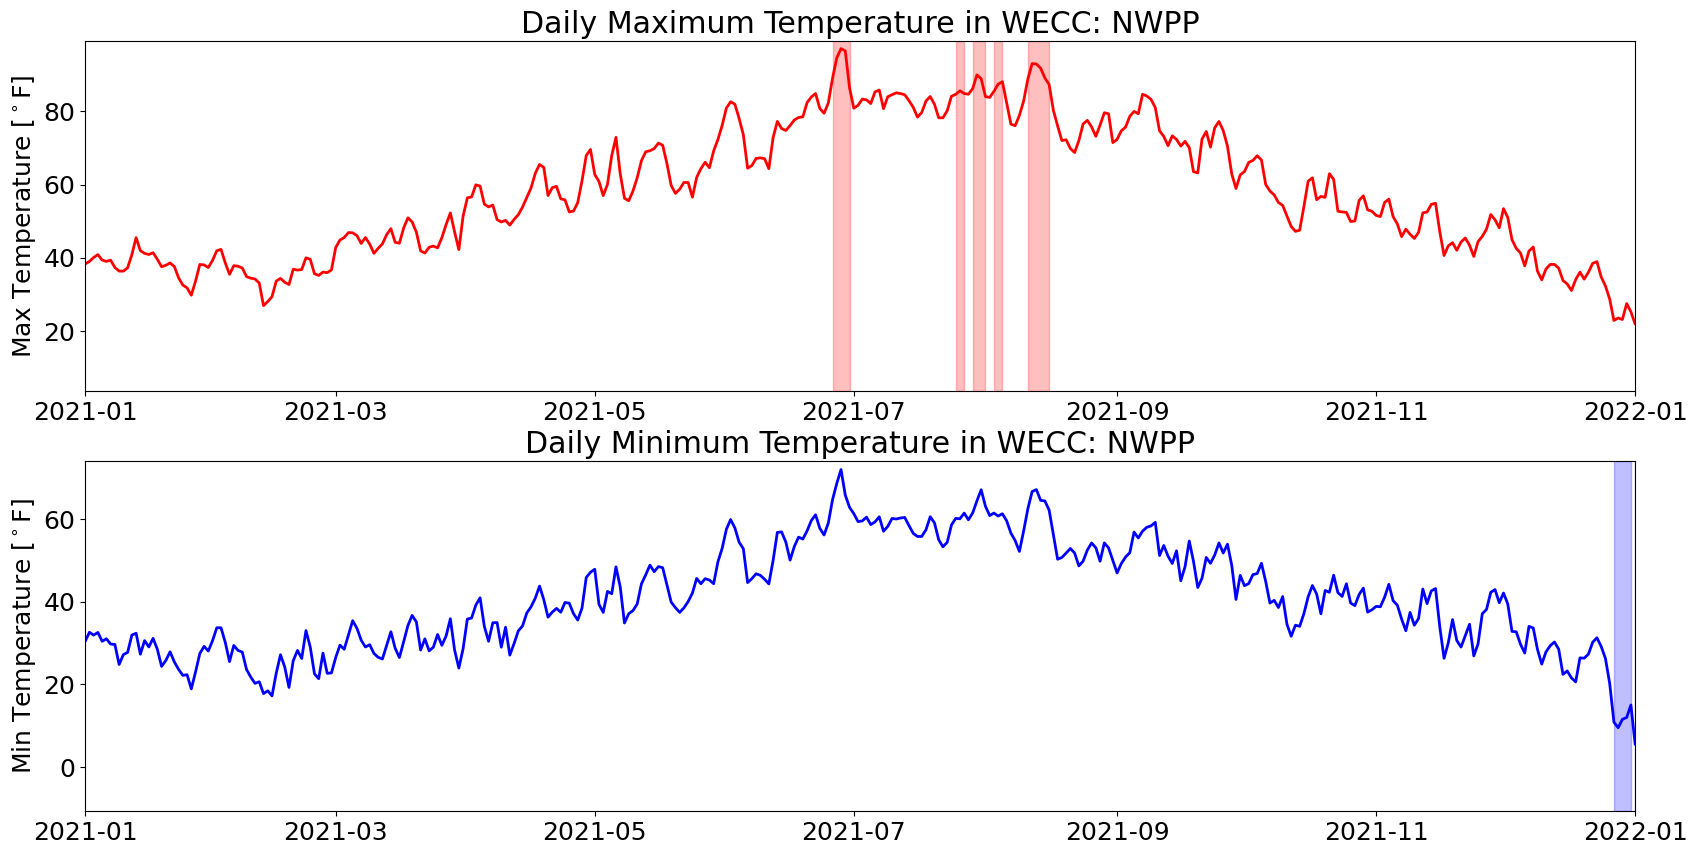

In [120]:
# Make the plot
plot_temperature_time_series(hw_cs_data_dir = hw_cs_data_dir, 
                             region = 6,
                             definition = 3,
                             image_output_dir = image_output_dir, 
                             image_resolution = 150, 
                             save_images = True)
